# HR Analytics Attrition 

#  Problem definition


We have the dataset of people analytics lets predict their attrition(Binary Classification).

# Data



 https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics
        
-

## Importing all the required liabraries

In [130]:
#lets import the visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#import the metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score

#lets filter the warnings
import warnings
warnings.filterwarnings('ignore')

# Reading / import the data

In [16]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


1. Attrition is target column  or dependent variables.
2.  Others are features/independent variables.

In [17]:
df.shape

(1470, 35)

In [5]:
#information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# unique values in the columns

df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
#To check the null values in the dataset

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null value available in our dataset.

<AxesSubplot:>

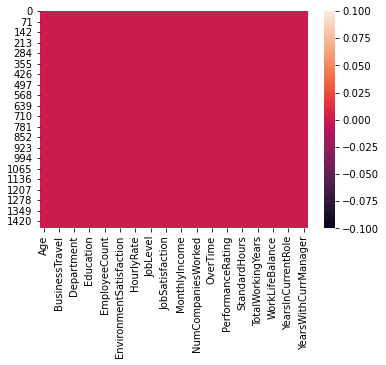

In [10]:
#we can check the null values through heatmap

sns.heatmap(df.isnull())

So, there is no null values in the dataset , we can proceed ahead for EDA / Data visualisation.

# EDA 

In [12]:
#Statical summary of dataset 

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There might be some outliers are present in the dataset , we'll detect through Zscore . 

In [18]:
#lets remove the features with single variables
df.drop(['EmployeeCount', 'Over18','StandardHours'], axis = 1, inplace = True)

In [19]:
df.shape

(1470, 32)

In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

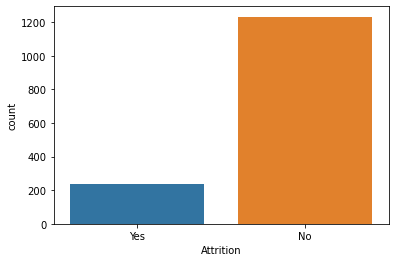

In [25]:
#Now , we,ll understand the data with the help of some graphs. 


sns.countplot(df['Attrition']);

In [39]:
#we are coverting the dtype of attrition column into numerical datatype for visualization purpose.

le= LabelEncoder()
df['Attrition']= le.fit_transform(df['Attrition'])

In [40]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

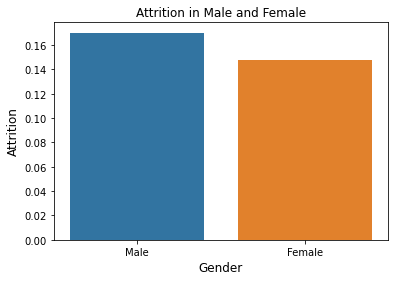

In [41]:
Gender_diff = df[['Gender', 'Attrition']].groupby('Gender', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(Gender_diff['Gender'], Gender_diff['Attrition'])
plt.title('Attrition in Male and Female', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Attrition', fontsize = 12);

There is more attrition in male category as compare to female.

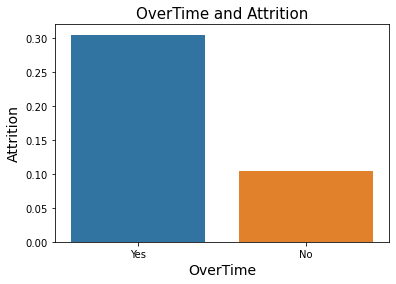

In [42]:
over_diff = df[['OverTime', 'Attrition']].groupby('OverTime', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(over_diff['OverTime'], over_diff['Attrition'])
plt.title('OverTime and Attrition', fontsize = 15)
plt.xlabel('OverTime', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

People doing overtime has more attrition.

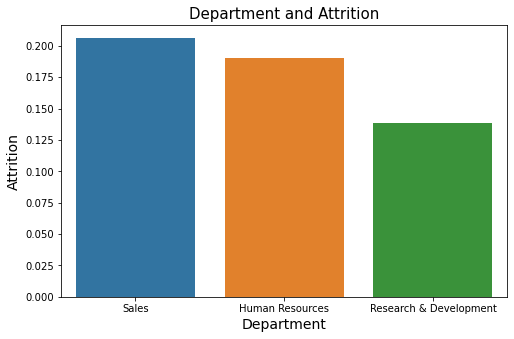

In [44]:
fig, ax = plt.subplots(figsize = (8, 5))
Department_diff = df[['Department', 'Attrition']].groupby('Department', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(Department_diff['Department'], Department_diff['Attrition'])
plt.title('Department and Attrition', fontsize = 15)
plt.xlabel('Department', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

People from sales department has more attrition.

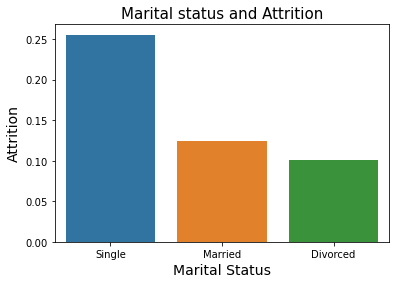

In [45]:
marital_diff = df[['MaritalStatus', 'Attrition']].groupby('MaritalStatus', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(marital_diff['MaritalStatus'], marital_diff['Attrition'])
plt.title('Marital status and Attrition', fontsize = 15)
plt.xlabel('Marital Status', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

Single category people has more attrition as compared to other categories.

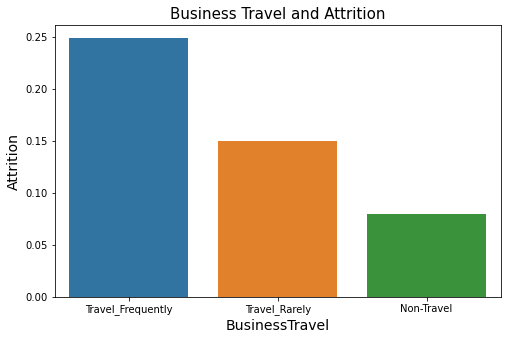

In [46]:
fig, ax = plt.subplots(figsize = (8, 5))
BusinessTravel_diff = df[['BusinessTravel', 'Attrition']].groupby('BusinessTravel', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(BusinessTravel_diff['BusinessTravel'], BusinessTravel_diff['Attrition'])
plt.title('Business Travel and Attrition', fontsize = 15)
plt.xlabel('BusinessTravel', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14);

People travel frequently has more attrition.

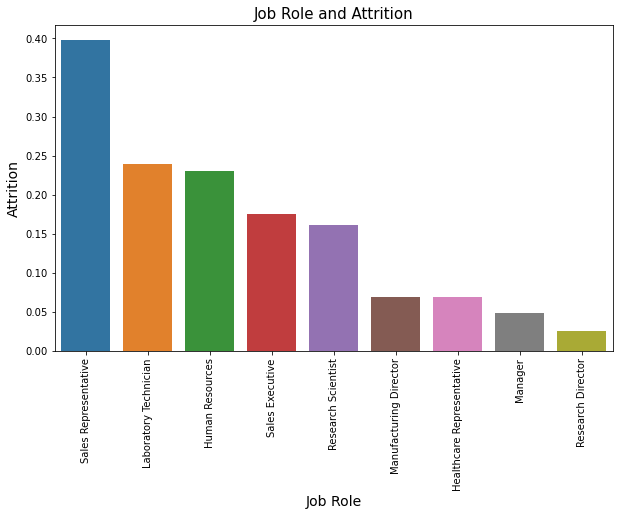

In [47]:
fig, ax = plt.subplots(figsize = (10, 6))
JobRole_diff = df[['JobRole', 'Attrition']].groupby('JobRole', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(JobRole_diff['JobRole'], JobRole_diff['Attrition'])
plt.title('Job Role and Attrition', fontsize = 15)
plt.xlabel('Job Role', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)
plt.xticks(rotation = 90);

Sales represntative has more attrition.

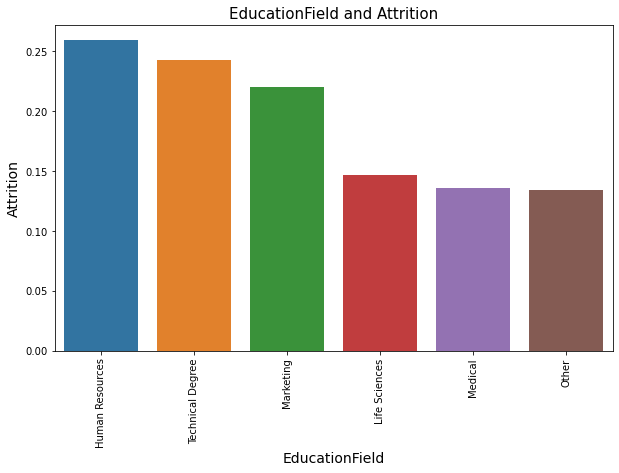

In [48]:
fig, ax = plt.subplots(figsize = (10, 6))
EducationField_diff = df[['EducationField', 'Attrition']].groupby('EducationField', as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
sns.barplot(EducationField_diff['EducationField'], EducationField_diff['Attrition'])
plt.title('EducationField and Attrition', fontsize = 15)
plt.xlabel('EducationField', fontsize = 14)
plt.ylabel('Attrition', fontsize = 14)
plt.xticks(rotation = 90);

People from Human Resources education field has more attrition.

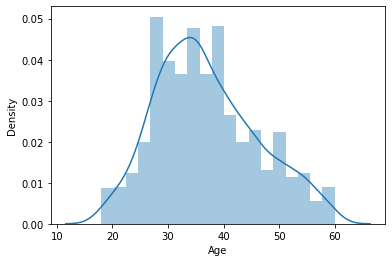

In [49]:
#lets check the distribution of the age feature
sns.distplot(df['Age']);

People belongs to age group of 30 to 40 has more attrition.

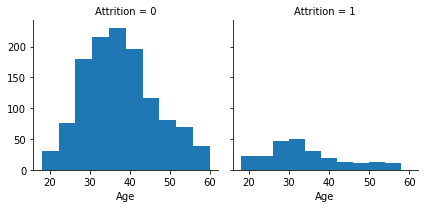

In [50]:
f = sns.FacetGrid(df, col = 'Attrition')
f.map(plt.hist, 'Age');

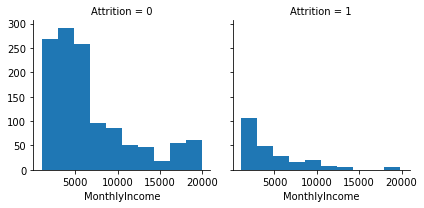

In [51]:
g = sns.FacetGrid(df, col = 'Attrition')
g.map(plt.hist, 'MonthlyIncome');

People with less than 5000 monthly salary has more attrition .

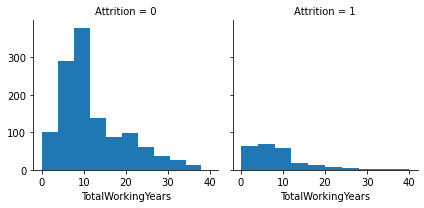

In [52]:
y = sns.FacetGrid(df, col = 'Attrition')
y.map(plt.hist, 'TotalWorkingYears');

People with around 10 working hrs has more attrition.

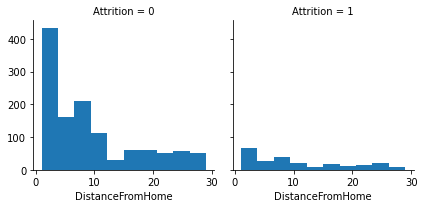

In [53]:
d = sns.FacetGrid(df, col = 'Attrition')
d.map(plt.hist, 'DistanceFromHome');

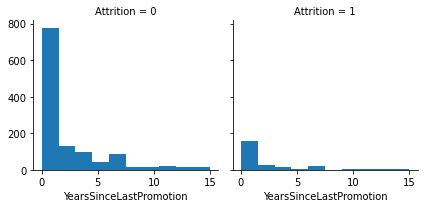

In [54]:
p = sns.FacetGrid(df, col = 'Attrition')
p.map(plt.hist, 'YearsSinceLastPromotion');

People with less than 5 years since last promotion has more attrition.

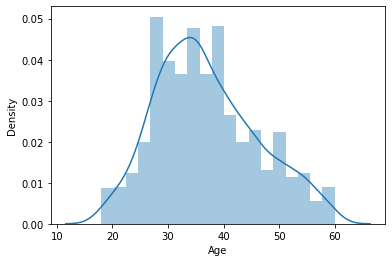

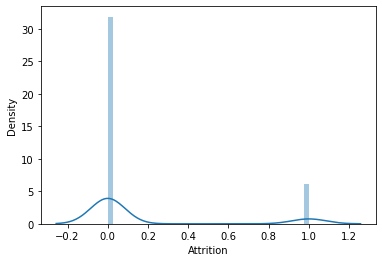

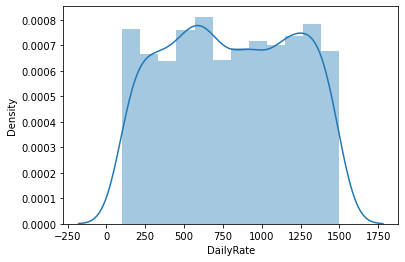

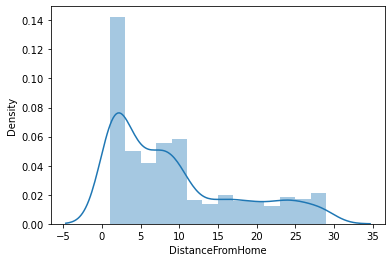

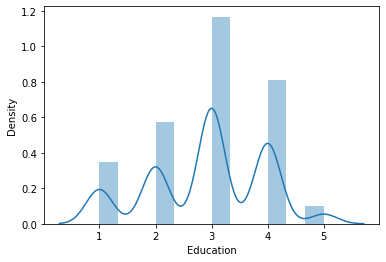

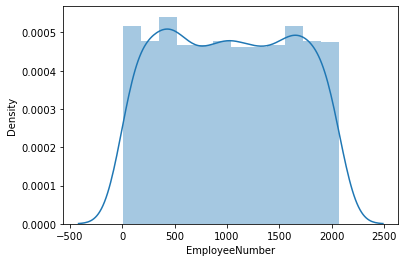

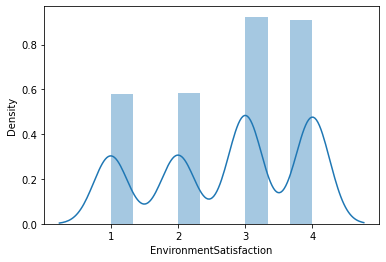

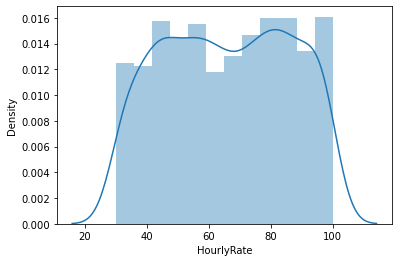

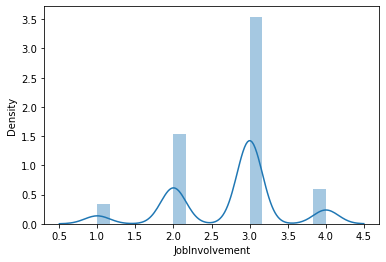

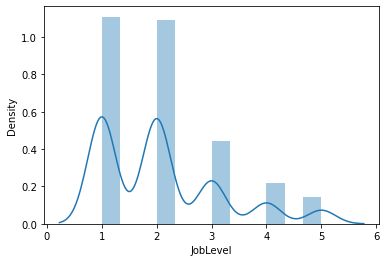

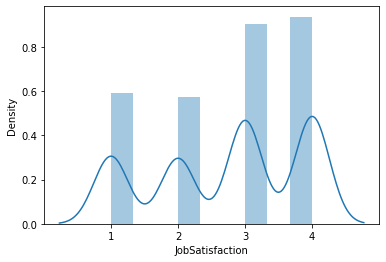

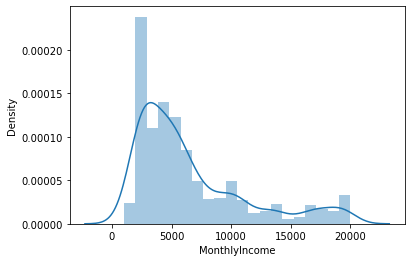

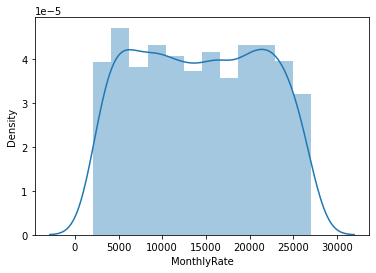

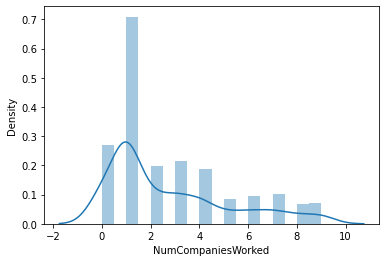

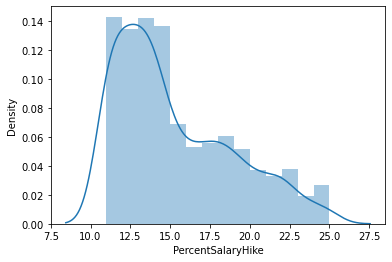

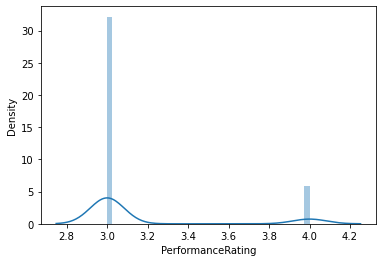

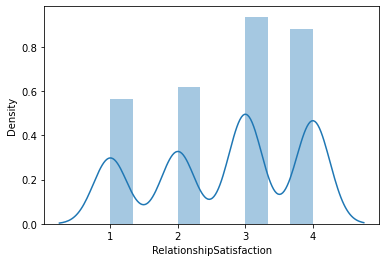

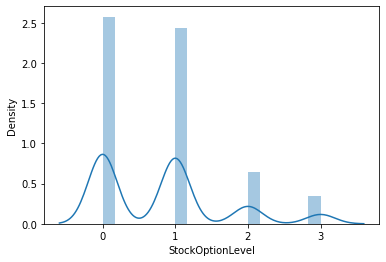

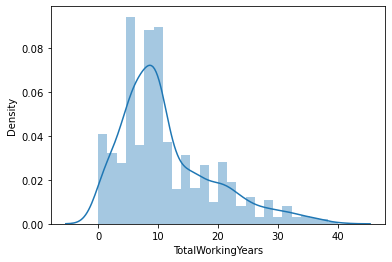

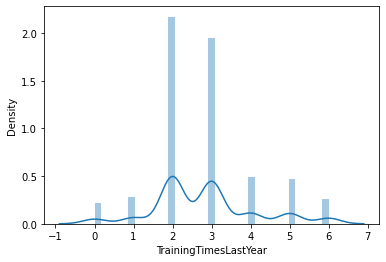

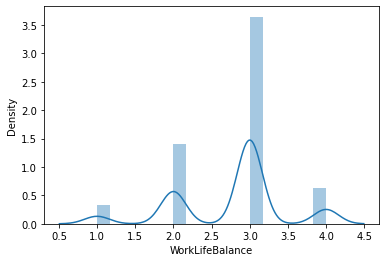

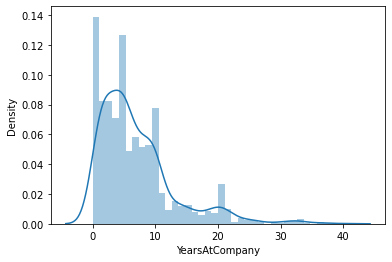

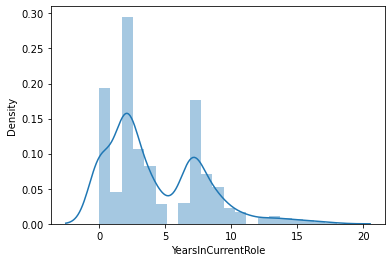

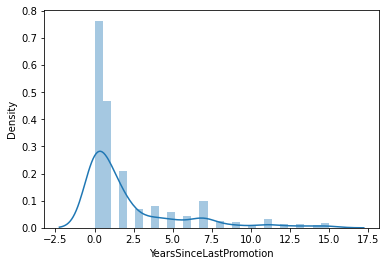

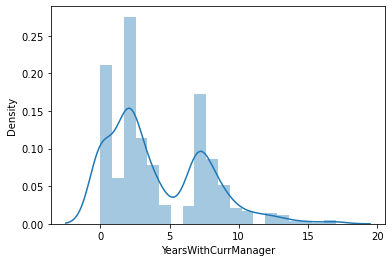

In [55]:
for cols in df.columns:
    if pd.api.types.is_numeric_dtype(df[cols]):
        sns.distplot(df[cols])
        plt.show()

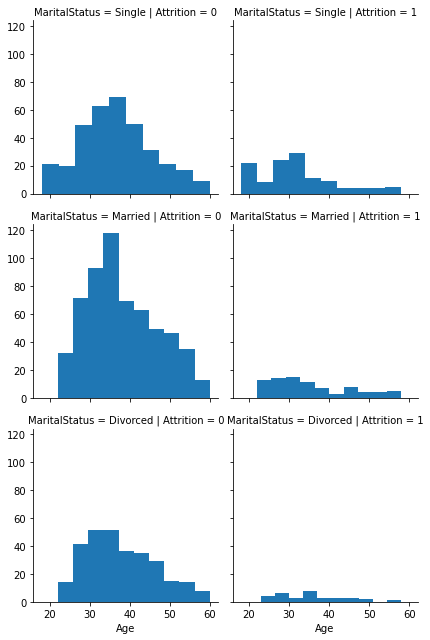

In [56]:
m = sns.FacetGrid(df, col = 'Attrition', row = 'MaritalStatus')
m.map(plt.hist, 'Age');

People with marital status Single and age between 28 to 35 has more attrition.

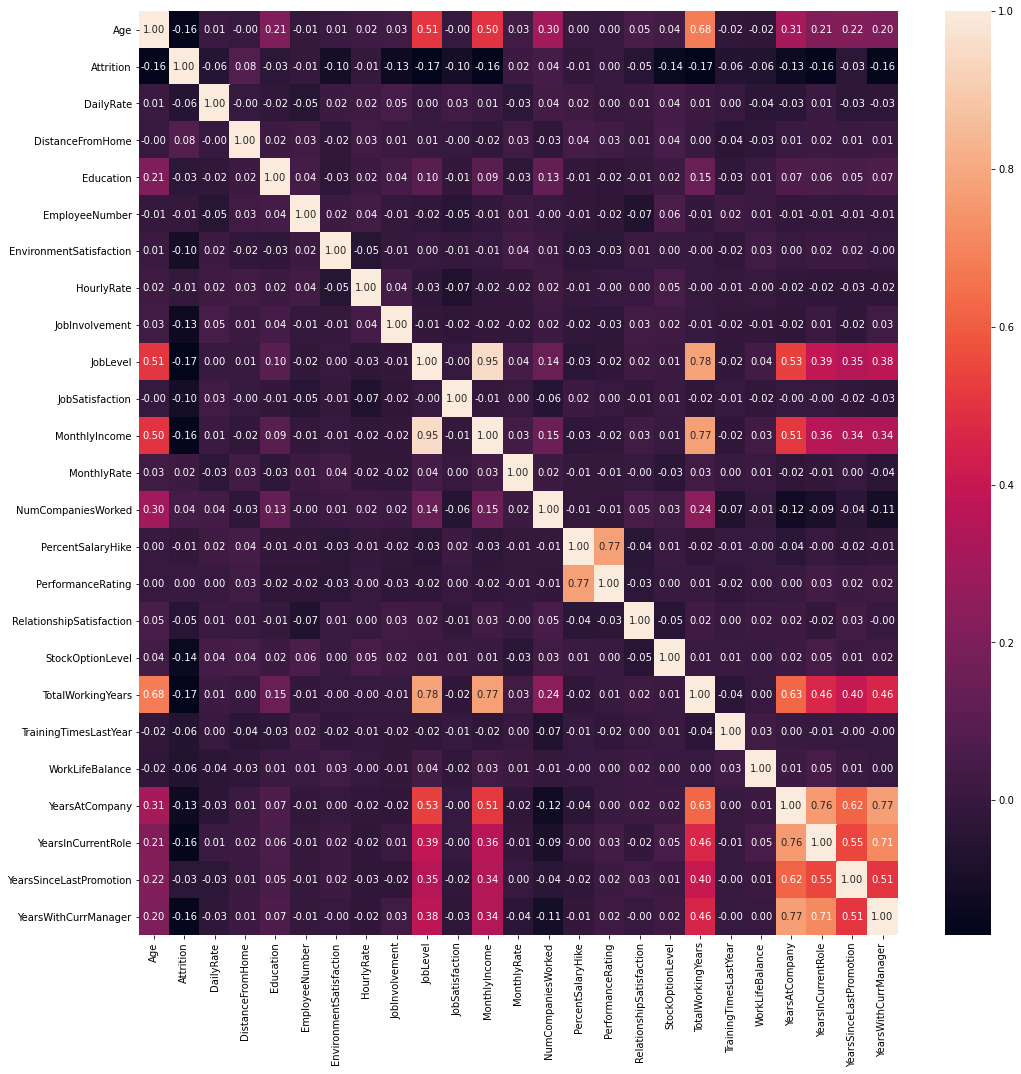

In [61]:
# Plotting the correlation map 

plt.figure(figsize=(17, 17))
sns.heatmap(df.corr(), annot = True, fmt = '.2f');

Lighter in shade , positive the correlation . Darker in shade , Negative the correlation.

In [62]:
#We are coverting the all category type column into numerical datatype , so that we can pass them for model training .

le = LabelEncoder()
for cols in df.columns:
    if pd.api.types.is_object_dtype(df[cols]):
        df[cols] = df[cols].astype('category')
        df[cols] = le.fit_transform(df[cols])

In [63]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


Done with label Encoding.

# Outliers

Age                             AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Attrition                    AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
BusinessTravel               AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
DailyRate                    AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Department                   AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
DistanceFromHome             AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Education                    AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
EducationField               AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
EmployeeNumber                 AxesSubplot(0.125,0.518913;0.0824468x0.16413)
EnvironmentSatisfaction     AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Gender                      AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
HourlyRate                  AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
JobInvolvement              AxesSubplot(0.520745,0.518913;0.0824468x0.16413)

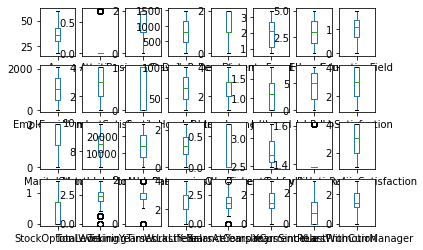

In [92]:
df.plot(kind ='box', subplots= True, layout= (4,8) )

In [64]:
from scipy.stats import zscore
zscore = abs(zscore(df))
zscore

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [65]:
df_new = df.loc[(zscore<3).all(axis = 1)]

In [66]:
print(df.shape)
print(df_new.shape)

(1470, 32)
(1387, 32)


# Skewness

In [69]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [73]:
#with log tranform method

for cols in df.columns:
    if df.skew().loc[cols] > 0.5:
        df[cols] = np.log1p(df[cols])

In [74]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
W

# Model Training and Testing

## Splitting and scaling the dependent and independent variavles

In [82]:
# Dividing the dataset into two dataset( i.e. Features and target columns)

x= df_new.drop(['Attrition'], axis = 1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,2061,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,2062,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2064,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,2065,4,1,...,3,4,0,17,3,2,9,6,0,8


In [83]:
y=df_new['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int64

In [85]:
#drop this column
x.drop([ 'EmployeeNumber'], axis = 1, inplace = True)

In [86]:
x.shape

(1387, 30)

In [87]:
y.shape

(1387,)

In [89]:
# normalize the data
sd = StandardScaler()
x_new = sd.fit_transform(x)

In [90]:
#split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2)

In [93]:
x_train.shape

(1109, 30)

In [94]:
x_test.shape

(278, 30)

In [95]:
y_train.shape

(1109,)

In [96]:
y_test.shape

(278,)

# ML Models

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [98]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [99]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))


---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.841726618705036


Cross_Val_Score =  0.8176154728391201


roc_auc_score =  0.546971864568431


classification_report
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       233
           1       0.56      0.11      0.19        45

    accuracy                           0.84       278
   macro avg       0.70      0.55      0.55       278
weighted avg       0.80      0.84      0.79       278



[[229   4]
 [ 40   5]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.8669064748201439


Cross_Val_Score =  0.8348972995516629


roc_auc_score =  0.6157844539818789


classification_report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       233
           1       0.79      0.24      0.37        45

  

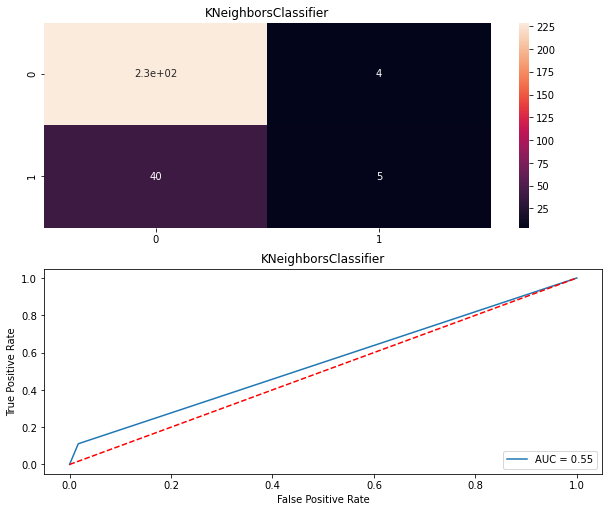

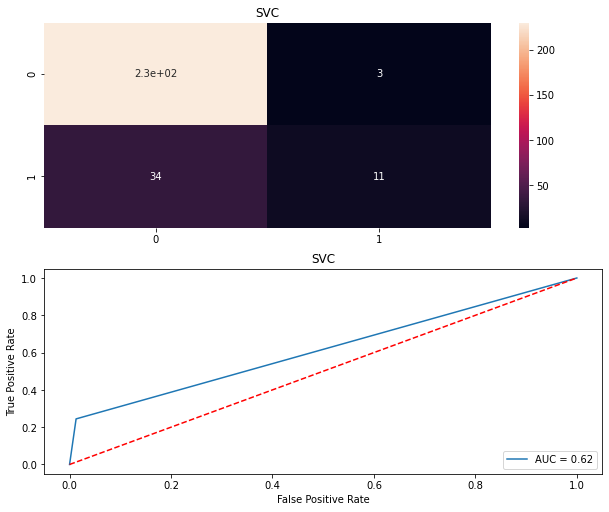

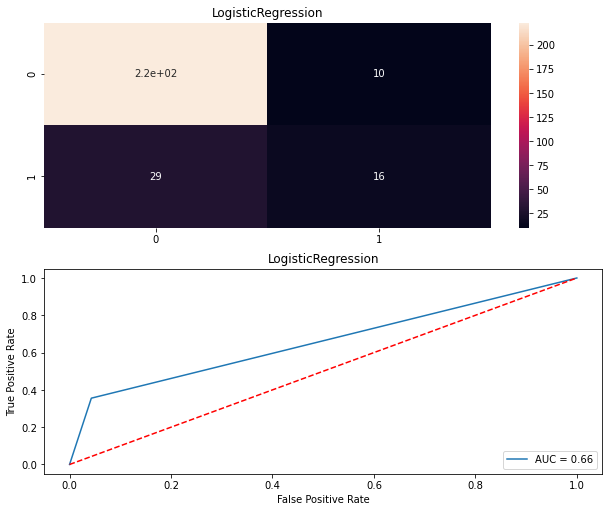

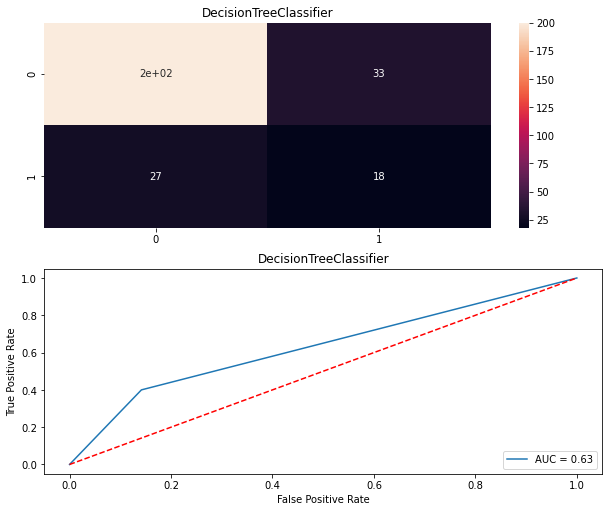

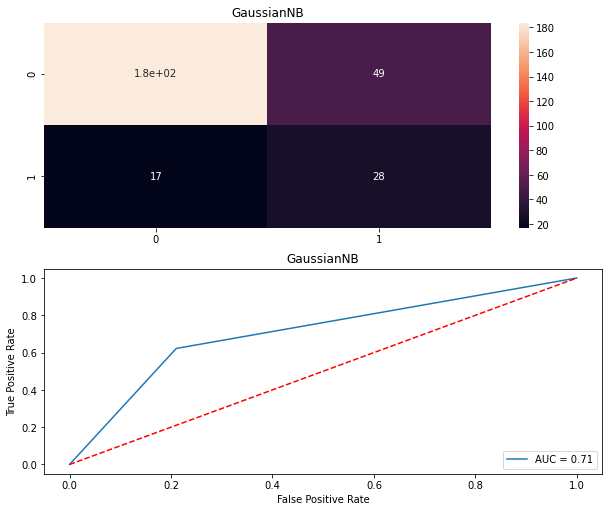

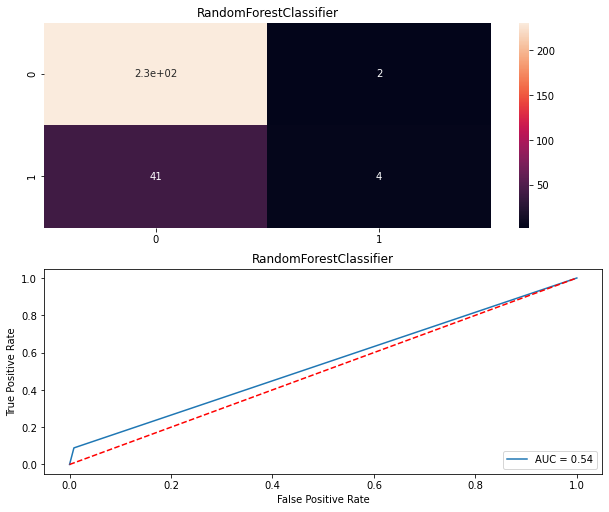

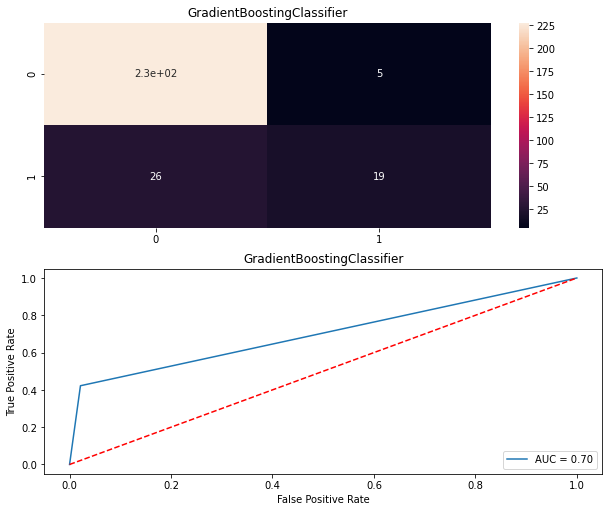

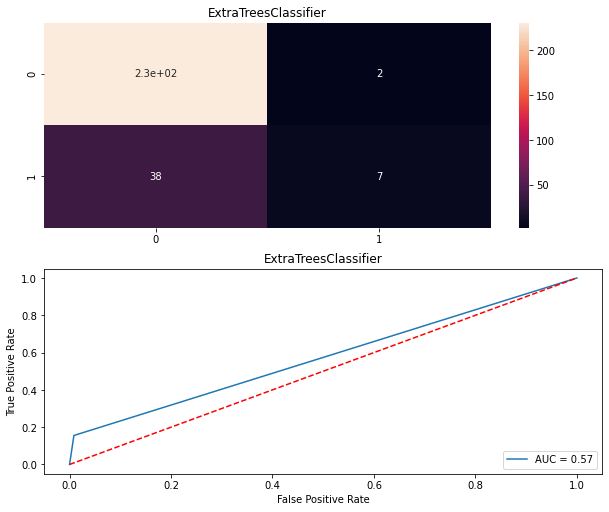

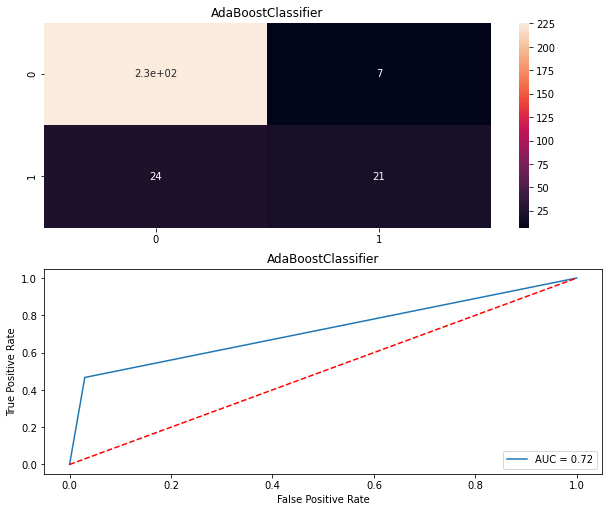

In [101]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')




# Hyperparameter tuning using 4 parameters

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [105]:
rf = RandomForestClassifier()

In [106]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [107]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [102]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result


,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.841727,0.817615,0.546972
1,SVC,0.866906,0.834897,0.615784
2,LogisticRegression,0.859712,0.839229,0.656319
3,DecisionTreeClassifier,0.784173,0.784423,0.629185
4,GaussianNB,0.762590,0.767798,0.705961
5,RandomForestClassifier,0.845324,0.850766,0.540153
6,GradientBoostingClassifier,0.888489,0.868095,0.700381
7,ExtraTreesClassifier,0.856115,0.857976,0.573486
8,AdaBoostClassifier,0.888489,0.874580,0.718312


From above we can see Gradient Boosting Classifier and AdaBoost classifer has same and hight accuracy score i.e 89% approx, but we'll go with AdaBoosteClassifer beacause of less difference between accuracy and cross_validation (CV score).

# Saving the model

In [109]:
import joblib
joblib.dump(ABC,"HR_Attrition_model.pkl")

['HR_Attrition_model.pkl']

# Prediction using ABC model

In [112]:
pred= ABC.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [114]:
y_test

128     0
925     0
429     0
804     0
1335    0
       ..
1137    0
779     1
372     0
696     0
42      1
Name: Attrition, Length: 278, dtype: int64

In [128]:
print('predictions', pred)
print('Actual', y_test)

predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1]
Actual 128     0
925     0
429     0
804     0
1335    0
       ..
1137    0
779     1
372     0
696     0
42      1
Name: Attrition, Length: 278, dtype: int64


In [131]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squred error', np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.11151079136690648
mean squared error: 0.11151079136690648
Root mean squred error 0.3339323155474871


# Conclusion:

In [ ]:
It was a binary classification problem , where AdaBoostClassifier performs best with 89%accuracy score as compare to other Models .